In [1]:
%time from data import *

CPU times: user 12.9 s, sys: 1.42 s, total: 14.3 s
Wall time: 14.8 s


# pair exploration

In [6]:
item_pairs_train.isDuplicate.value_counts(normalize=True)

0    0.577362
1    0.422638
Name: isDuplicate, dtype: float64

In [22]:
item_pairs_train.generationMethod.value_counts(normalize=True)

1    0.682492
3    0.270067
2    0.047441
Name: generationMethod, dtype: float64

In [5]:
item_pairs_train.groupby('generationMethod')['isDuplicate'].mean()

generationMethod
1    0.508611
2    1.000000
3    0.103955
Name: isDuplicate, dtype: float64

duplication ratio is quite diffent acrosss generationMethod

In [14]:
(item_pairs_train.itemID_1 < item_pairs_train.itemID_2).all()

True

In [23]:
(item_pairs_test.itemID_1 < item_pairs_test.itemID_2).all()

True

itemID_1 < itemID_2

In [10]:
item_pairs_train.head()

,itemID_1,itemID_2,isDuplicate,generationMethod
0,1,4112648,1,1
1,3,1991275,1,1
2,4,1223296,0,1
3,7,1058851,1,1
4,8,2161930,1,1


In [12]:
item_pairs_train.groupby(['itemID_1', 'itemID_2'])['isDuplicate'].count().max()

1

In [24]:
item_pairs_test.groupby(['itemID_1', 'itemID_2'])['itemID_1'].count().max()

1

item pair is unique

In [29]:
ids_train = set(item_pairs_train.itemID_1.tolist() + item_pairs_train.itemID_2.tolist())
n_ids_train = len(ids_train)
print(n_ids_train)

3344613


In [154]:
print(item_pairs_train.shape[0])
item_pairs_train.shape[0] / ((n_ids_train**2 -n_ids_train)/2)

2991396


5.348257232893055e-07

In [31]:
ids_test = set(item_pairs_test.itemID_1.tolist() + item_pairs_test.itemID_2.tolist())
n_ids_test = len(ids_test)
print(n_ids_test)

1315205


In [155]:
print(item_pairs_test.shape[0])
item_pairs_test.shape[0] / ((n_ids_test**2 -n_ids_test)/2)

1044196


1.2073284887691106e-06

* only tiny fraction is labelled
* test pair is more than train

In [33]:
ids_train.intersection(ids_test)

set()

In [38]:
sorted(ids_train)[:20]

[1, 3, 4, 7, 8, 9, 12, 15, 16, 19, 20, 21, 22, 26, 28, 29, 32, 33, 35, 39]

In [42]:
sorted(ids_test)[:10]

[5, 6, 11, 23, 30, 31, 36, 47, 48, 52]

In [44]:
len(ids_train) + len(ids_test) - max(max(ids_train), max(ids_test))

-1452185

* train, test id has no intersection
* it's not complete as id

# category

In [185]:
%matplotlib inline
import seaborn
seaborn.set()

In [112]:
category_parent.parentCategoryID.value_counts()

6      9
7      7
4      7
35     6
2      6
5      5
1      5
113    2
110    2
8      2
Name: parentCategoryID, dtype: int64

In [87]:
import networkx as nx
category_tree = nx.DiGraph()
category_tree.add_edges_from(category_parent.to_records(index=False))

In [83]:
from networkx.drawing.nx_agraph import graphviz_layout

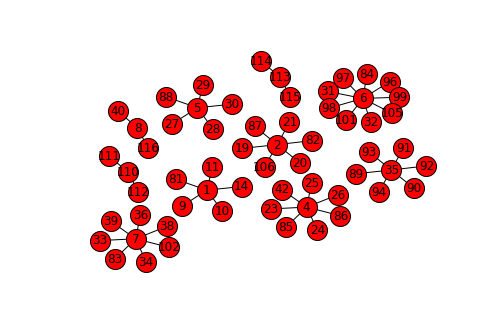

In [111]:
nx.draw(category_tree, graphviz_layout(category_tree),
        node_size=400,
        with_labels=True, arrows=True)

# info

In [170]:
set(item_info_train.index) == ids_train

True

In [171]:
set(item_info_test.index) == ids_test

True

data is consistent

In [66]:
item_info_train.head()

,itemID,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
0,1,81,Продам Камаз 6520,Продам Камаз 6520 20 тонн,"[1064094, 5252822, 6645873, 6960145, 9230265]",{},300000.0,648140,NaN,64.686946,30.815924
1,3,14,Yamaha r6,Весь в тюнинге.,"[11919573, 14412228, 3204180, 6646877]",{},300000.0,639040,NaN,55.678037,37.256548
2,4,84,iPhone 3gs 8gb,"Телефон в хорошем состоянии, трещин и сколов н...","[14384831, 6102021]",{},3500.0,640650,NaN,56.239398,43.460458
3,7,84,Xiaomi Mi4 3гб RAM + 16гб ROM белый,"Отличный подарок на новый год от ""китайской ap...",[],{},13500.0,662210,NaN,55.777170,37.586194
4,8,39,Лыжные ботинки,"Лыжные ботинки в хорошем состоянии, 34 размер","[13718854, 4787310]",{},500.0,624360,NaN,55.777170,37.586194


In [70]:
from bokeh.io import output_notebook, show
output_notebook()

Loading BokehJS ...

In [71]:
from bokeh.charts import Bar

In [117]:
item_info_train.shape[0]

3344613

In [148]:
title_freq = item_info_train.title.value_counts(normalize=True)

In [150]:
title_freq.head()

Ищу работу       0.005867
Платье           0.003731
Сниму комнату    0.001410
Куртка           0.001141
Водитель         0.001029
Name: title, dtype: float64

* Ищу работу: Looking for work
* Платье: Dress
* Сниму комнату: Renting a Room
* Куртка: Jacket
* Водитель: Driver

In [151]:
title_freq_high = title_freq[title_freq > 5e-4]

In [153]:
p = Bar(title_freq_high, plot_width=1000)
show(p)

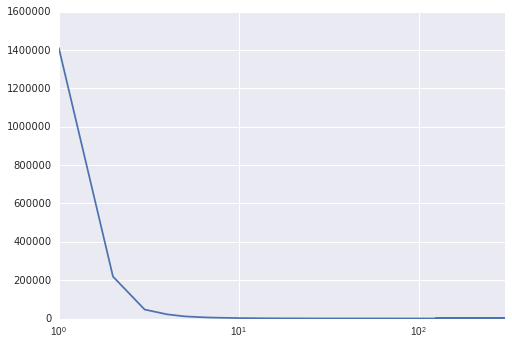

In [189]:
title_freq_freq.plot(logx=True)

In [156]:
from util import df_sample_n

In [159]:
df_sample_n(item_pairs_train, 5, 12)

,itemID_1,itemID_2,isDuplicate,generationMethod
1461501,1726575,4369469,0,1
2661617,4069878,5216887,0,3
2133634,2822325,5102216,1,1
2303235,3165159,3985421,1,1
1392564,1629096,4602213,0,3


In [163]:
item_info_train.loc[[2822325, 5102216]]

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
2822325,84,Смартфон Билайн Фаст,Срочно породам\nОтличны состояний \nНовый теле...,"[108213, 10867580, 13177350, 7826006, 8559142]",{},5005.0,650310,NaN,54.531633,52.800673
5102216,84,Билайн Фаст,Срочно породам\nЕст гарантиях\nКомплекте все е...,"[11271321, 2181238, 2351048, 3561210, 617828]",{},5555.0,650310,NaN,54.531633,52.800673


(55.77717, 37.586194)     0.143621
(55.753653, 37.6198)      0.038021
(45.034942, 38.976032)    0.019544
(47.227151, 39.744972)    0.015333
(54.738437, 55.983161)    0.012851
dtype: float64

In [181]:
print(item_info_train.description.loc[2822325])

Срочно породам
Отличны состояний 
Новый телефон 
Ест гарантиях
Комплекте все ест

Звонок послы 17:00 приму 

Плёнка чехол 
Все комплект коробка документы
гарантий талон все ест

Технические характеристики смартфона Билайн Фаст:

Операционная система: Google Android 5.1 (Lollipop)
Процессор: 1.0 GHz, 4-ядерный, MediaTek MT6735M
Память: 1 Gb (RAM) + 8 Gb (ROM), поддержка карт памяти microSDHC до 32 Gb
Экран: IPS, 5", 480x854 пикселей, 16 млн. цветов, мультитач 5 точек
Камера: 5 MPix (автофокус) - основная, 2 MPix - фронтальная
Разъем для подключения аудио: стандартный 3.5 мм
Разъем для SIM-карты: mini-SIM
Стандарты и диапазоны: GSM 900/1800 MHz, UMTS 900/2100 MHz, LTE B3/B7/B20
Скорость приема / передачи данных: до 150/50 Mbit/s (указанные скорости доступны при использовании технологии LTE и являются теоретическим максимумом)
Беспроводные технологии: BT 4.0, Wi-Fi 802.11 a/b/g/n (2.4/5 GHz)
Навигационные возможности: GPS, A-GPS
Коммуникации: голосовые вызовы, прием / передача сообщений S

In [182]:
print(item_info_train.description.loc[5102216])

Срочно породам
Ест гарантиях
Комплекте все ест

Звонок послы 17:00 приму 

Плёнка чехол 
Все комплект коробка документы
гарантий талон все ест

Технические характеристики смартфона Билайн Фаст:

Операционная система: Google Android 5.1 (Lollipop)
Процессор: 1.0 GHz, 4-ядерный, MediaTek MT6735M
Память: 1 Gb (RAM) + 8 Gb (ROM), поддержка карт памяти microSDHC до 32 Gb
Экран: IPS, 5", 480x854 пикселей, 16 млн. цветов, мультитач 5 точек
Камера: 5 MPix (автофокус) - основная, 2 MPix - фронтальная
Разъем для подключения аудио: стандартный 3.5 мм
Разъем для SIM-карты: mini-SIM
Стандарты и диапазоны: GSM 900/1800 MHz, UMTS 900/2100 MHz, LTE B3/B7/B20
Скорость приема / передачи данных: до 150/50 Mbit/s (указанные скорости доступны при использовании технологии LTE и являются теоретическим максимумом)
Беспроводные технологии: BT 4.0, Wi-Fi 802.11 a/b/g/n (2.4/5 GHz)
Навигационные возможности: GPS, A-GPS
Коммуникации: голосовые вызовы, прием / передача сообщений SMS и MMS
Батарея: 2200 мА·ч
 цвета

In [172]:
item_info_train.loc[[1726575, 4369469]]

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
1726575,29,Adidas Climaproof ветровки р. 110 и 116 новые,Новые ветровки-куртки адидас оригинал на мальч...,"[1261481, 6871662, 8613832, 9101407]",{},1500.0,654070,500048.0,56.797398,60.633102
4369469,29,Adidas безрукавка р. 116 новая,"Новая безрукавка ( жилет) адидас, утепленная, ...","[10317365, 11802706, 14412620, 2445219, 2844436]",{},1500.0,654070,500048.0,56.797398,60.633102


In [174]:
df_sample_n(item_pairs_train[(item_pairs_train.generationMethod==3) & (item_pairs_train.isDuplicate==1)] , 5, 12)

,itemID_1,itemID_2,isDuplicate,generationMethod
2831307,4691336,4857731,1,3
722032,781106,2134253,1,3
1435319,1688845,6002197,1,3
1299278,1502002,5856886,1,3
2667967,4089079,4484153,1,3


In [176]:
item_info_train.loc[[4691336, 4857731]]

,categoryID,title,description,images_array,attrsJSON,price,locationID,metroID,lat,lon
itemID,,,,,,,,,,
4691336,34,"Велосипед 26"" ""Азимут""",Велосипед горный в отличном состоянии.\nПер.то...,[11632620],{},7000.0,640160,NaN,68.963254,33.077918
4857731,34,"Азимут 26""",Велосипед в отличном состоянии.\nAzimut Mystic...,"[11517277, 12649284, 6330587]",{},6510.0,640160,NaN,68.963254,33.077918


# geo location

In [204]:
lat_lon_freq = item_info_train.groupby(['lat', 'lon'])['title'].count().order(ascending=False).reset_index().rename(columns={'title': 'count'})

/home/lq/.local/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: order is deprecated, use sort_values(...)
  if __name__ == '__main__':


In [206]:
lat_lon_freq['ratio'] = lat_lon_freq['count']/item_info_train.shape[0]

In [208]:
lat_lon_freq.head(20)

,lat,lon,count,ratio
0,55.777170,37.586194,480356,0.143621
1,55.753653,37.619800,127167,0.038021
2,45.034942,38.976032,65366,0.019544
3,47.227151,39.744972,51283,0.015333
4,54.738437,55.983161,42980,0.012851
5,55.152161,61.387103,39926,0.011937
6,59.938806,30.314278,36090,0.010790
7,58.004785,56.237654,30679,0.009173
8,42.983106,47.504978,30347,0.009073
9,48.707793,44.515942,28661,0.008569


In [210]:
from bokeh.models import GMapPlot, GMapOptions, Circle

# similarity